In [13]:
import pandas as pd 
import matplotlib.pyplot as plt 
from math import pi
import plotly.graph_objects as go

In [2]:
df = pd.read_csv('cleaned_data.csv')
df.head()

,Unnamed: 0,No,ID,Name,Age,Nationality,Overall,Potential,Club,Value,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Feet,Inches
0,0,0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110.5,...,33,28,26,6,11,15,14,8,5,7
1,1,1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77.0,...,28,31,23,7,11,15,14,11,6,2
2,2,2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118.5,...,27,24,33,9,9,15,15,11,5,9
3,3,3,193080,De Gea,27,Spain,91,93,Manchester United,72.0,...,15,21,13,90,85,87,88,94,6,4
4,4,4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102.0,...,68,58,51,15,13,5,10,13,5,11


In [3]:
most_important_features = ['Age', 'Potential', 'Finishing', 'Reactions', 'Dribbling', 'BallControl', 'LongShots', 'Volleys', 'Vision']

In [4]:
df_subset = df.loc[:,['Name']+most_important_features]

In [21]:
df_subset.head(10)

,Name,Age,Potential,Finishing,Reactions,Dribbling,BallControl,LongShots,Volleys,Vision
0,L. Messi,31,94,95,95,97,96,94,86,94
1,Cristiano Ronaldo,33,94,94,96,88,94,93,87,82
2,Neymar Jr,26,93,87,94,96,95,82,84,87
3,De Gea,27,93,13,90,18,42,12,13,68
4,K. De Bruyne,27,92,82,91,86,91,91,82,94
5,E. Hazard,27,91,84,90,95,94,80,80,89
6,L. Modri?,32,91,72,90,90,93,82,76,92
7,L. Suárez,31,91,93,92,87,90,85,88,84
8,Sergio Ramos,32,91,60,85,63,84,59,66,63
9,J. Oblak,25,93,11,86,12,16,12,13,70


In [6]:
categories = list(df_subset)[2:]
categories

['Potential',
 'Finishing',
 'Reactions',
 'Dribbling',
 'BallControl',
 'LongShots',
 'Volleys',
 'Vision']

In [7]:
N = len(categories)

In [8]:
chosen_name = 'De Gea'
values = df_subset.loc[df_subset['Name'] == chosen_name,:].drop(['Name', 'Age'], axis=1).values.flatten().tolist()

In [9]:
values += values[:1]

In [10]:
values

[93, 13, 90, 18, 42, 12, 13, 68, 93]

In [11]:
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Matplotlib

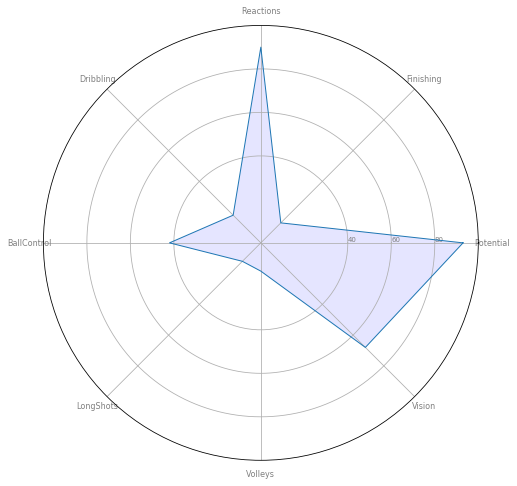

In [12]:
plt.figure(figsize=(12,8))

ax = plt.subplot(111, polar=True)

plt.xticks(angles[:-1], categories, color='grey', size=8)

ax.set_rlabel_position(0)

plt.yticks([40, 60, 80], ["40", "60", "80"], color='grey', size=7)
plt.ylim(0,100)

ax.plot(angles, values, linewidth=1, linestyle='solid')

ax.fill(angles, values, 'b', alpha=0.1);

# Plotly

In [23]:
fig = go.Figure()

chosen_name_1 = 'L. Messi'
chosen_name_2 = 'Sergio Ramos'
values_1 = df_subset.loc[df_subset['Name'] == chosen_name_1,:].drop(['Name', 'Age'], axis=1).values.flatten().tolist()
values_2 = df_subset.loc[df_subset['Name'] == chosen_name_2,:].drop(['Name', 'Age'], axis=1).values.flatten().tolist()

fig.add_trace(go.Scatterpolar(
      r=values_1,
      theta=categories,
      fill='toself',
      name=f"{chosen_name_1}"
))
fig.add_trace(go.Scatterpolar(
      r=values_2,
      theta=categories,
      fill='toself',
      name=f"{chosen_name_2}"
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 100]
    )),
  showlegend=True
)

fig.show()